In [1]:
import os
import numpy as np
import pandas as pd

# Libraries for graphs
import matplotlib.pyplot as plt
import seaborn as sns

# Libraries for Machine Learning/Data Science
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

## Change the current directory to the directory where your dataset is located

In [2]:
os.chdir("/Users/user/Desktop/python_stuff/ML/Pandas/Dataset")
os.listdir()

['income.csv', 'Toyota.csv.txt']

In [3]:
dataset = pd.read_csv("income.csv")

In [4]:
# Make a copy of the dataset to do some operation and get insights on the data
df = dataset.copy()

## Data exploration

In [5]:
df.head()

,age,JobType,EdType,maritalstatus,occupation,relationship,race,gender,capitalgain,capitalloss,hoursperweek,nativecountry,SalStat
0,45,Private,HS-grad,Divorced,Adm-clerical,Not-in-family,White,Female,0,0,28,United-States,"less than or equal to 50,000"
1,24,Federal-gov,HS-grad,Never-married,Armed-Forces,Own-child,White,Male,0,0,40,United-States,"less than or equal to 50,000"
2,44,Private,Some-college,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,40,United-States,"greater than 50,000"
3,27,Private,9th,Never-married,Craft-repair,Other-relative,White,Male,0,0,40,Mexico,"less than or equal to 50,000"
4,20,Private,Some-college,Never-married,Sales,Not-in-family,White,Male,0,0,35,United-States,"less than or equal to 50,000"


In [6]:
# data types of each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31978 entries, 0 to 31977
Data columns (total 13 columns):
age              31978 non-null int64
JobType          31978 non-null object
EdType           31978 non-null object
maritalstatus    31978 non-null object
occupation       31978 non-null object
relationship     31978 non-null object
race             31978 non-null object
gender           31978 non-null object
capitalgain      31978 non-null int64
capitalloss      31978 non-null int64
hoursperweek     31978 non-null int64
nativecountry    31978 non-null object
SalStat          31978 non-null object
dtypes: int64(4), object(9)
memory usage: 3.2+ MB


In [7]:
df.isna().sum()

age              0
JobType          0
EdType           0
maritalstatus    0
occupation       0
relationship     0
race             0
gender           0
capitalgain      0
capitalloss      0
hoursperweek     0
nativecountry    0
SalStat          0
dtype: int64

In [8]:
df.describe()

,age,capitalgain,capitalloss,hoursperweek
count,31978.000000,31978.000000,31978.000000,31978.000000
mean,38.579023,1064.360623,86.739352,40.417850
std,13.662085,7298.596271,401.594301,12.345285
min,17.000000,0.000000,0.000000,1.000000
25%,28.000000,0.000000,0.000000,40.000000
50%,37.000000,0.000000,0.000000,40.000000
75%,48.000000,0.000000,0.000000,45.000000
max,90.000000,99999.000000,4356.000000,99.000000


In [9]:
categorical_col = df.describe(include='O')
categorical_col

,JobType,EdType,maritalstatus,occupation,relationship,race,gender,nativecountry,SalStat
count,31978,31978,31978,31978,31978,31978,31978,31978,31978
unique,9,16,7,15,6,5,2,41,2
top,Private,HS-grad,Married-civ-spouse,Prof-specialty,Husband,White,Male,United-States,"less than or equal to 50,000"
freq,22286,10368,14692,4038,12947,27430,21370,29170,24283


In [10]:
print(df["occupation"].value_counts())
print(np.unique(df["occupation"]))

 Prof-specialty       4038
 Craft-repair         4030
 Exec-managerial      3992
 Adm-clerical         3721
 Sales                3584
 Other-service        3212
 Machine-op-inspct    1966
 ?                    1816
 Transport-moving     1572
 Handlers-cleaners    1350
 Farming-fishing       989
 Tech-support          912
 Protective-serv       644
 Priv-house-serv       143
 Armed-Forces            9
Name: occupation, dtype: int64
[' ?' ' Adm-clerical' ' Armed-Forces' ' Craft-repair' ' Exec-managerial'
 ' Farming-fishing' ' Handlers-cleaners' ' Machine-op-inspct'
 ' Other-service' ' Priv-house-serv' ' Prof-specialty' ' Protective-serv'
 ' Sales' ' Tech-support' ' Transport-moving']


### After looking at every columns, you can see that "JobType" and "occupation" column contains " ?". We need to replace it with NaN value

In [11]:
dataset1 = pd.read_csv("income.csv", na_values=[" ?"])

In [12]:
df1 = dataset1.copy(deep=True)

In [13]:
df1.isna().sum()

age                 0
JobType          1809
EdType              0
maritalstatus       0
occupation       1816
relationship        0
race                0
gender              0
capitalgain         0
capitalloss         0
hoursperweek        0
nativecountry       0
SalStat             0
dtype: int64

In [40]:
missing = df1[df1.isnull().any(axis=1)]
missing.sort_values(["JobType"])

,age,JobType,EdType,maritalstatus,occupation,relationship,race,gender,capitalgain,capitalloss,hoursperweek,nativecountry,SalStat
4825,18,Never-worked,10th,Never-married,NaN,Own-child,White,Male,0,0,40,United-States,"less than or equal to 50,000"
10215,23,Never-worked,7th-8th,Divorced,NaN,Not-in-family,White,Male,0,0,35,United-States,"less than or equal to 50,000"
14073,17,Never-worked,10th,Never-married,NaN,Own-child,White,Male,0,0,30,United-States,"less than or equal to 50,000"
19542,18,Never-worked,11th,Never-married,NaN,Own-child,White,Female,0,0,10,United-States,"less than or equal to 50,000"
22385,20,Never-worked,Some-college,Never-married,NaN,Own-child,Black,Male,0,0,40,United-States,"less than or equal to 50,000"
31296,30,Never-worked,HS-grad,Married-civ-spouse,NaN,Wife,Black,Female,0,0,40,United-States,"less than or equal to 50,000"
31305,18,Never-worked,Some-college,Never-married,NaN,Own-child,White,Male,0,0,4,United-States,"less than or equal to 50,000"
8,17,NaN,11th,Never-married,NaN,Own-child,White,Female,0,0,5,United-States,"less than or equal to 50,000"
17,32,NaN,Some-college,Married-civ-spouse,NaN,Husband,White,Male,0,0,40,United-States,"less than or equal to 50,000"
29,22,NaN,Some-college,Never-married,NaN,Own-child,White,Male,0,0,40,United-States,"less than or equal to 50,000"


In [14]:
df1["JobType"].value_counts()

 Private             22286
 Self-emp-not-inc     2499
 Local-gov            2067
 State-gov            1279
 Self-emp-inc         1074
 Federal-gov           943
 Without-pay            14
 Never-worked            7
Name: JobType, dtype: int64

### 1809 Jobtype has NaN value
### 1816 Occupation has NaN value
### 7 Jobtype has "Never worked" value
### The 7 Jobtype having "Never Worked" value also have NaN value in their corrosponding Occupation value
### So instead of replacing the null values with max count, we can just drop the null values.

In [15]:
df2 = df1.dropna(axis=0)
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30162 entries, 0 to 31977
Data columns (total 13 columns):
age              30162 non-null int64
JobType          30162 non-null object
EdType           30162 non-null object
maritalstatus    30162 non-null object
occupation       30162 non-null object
relationship     30162 non-null object
race             30162 non-null object
gender           30162 non-null object
capitalgain      30162 non-null int64
capitalloss      30162 non-null int64
hoursperweek     30162 non-null int64
nativecountry    30162 non-null object
SalStat          30162 non-null object
dtypes: int64(4), object(9)
memory usage: 3.2+ MB


In [16]:
correlation = df2.corr()
correlation

,age,capitalgain,capitalloss,hoursperweek
age,1.000000,0.080154,0.060165,0.101599
capitalgain,0.080154,1.000000,-0.032229,0.080432
capitalloss,0.060165,-0.032229,1.000000,0.052417
hoursperweek,0.101599,0.080432,0.052417,1.000000


### Gender proportion

In [18]:
gender = pd.crosstab(index = df2["gender"],
                     columns="count",
                     normalize=True)
gender

col_0,count
gender,
Female,0.324315
Male,0.675685


In [23]:
gender_vs_salary = pd.crosstab(index = df2["gender"],
                               columns=df2["SalStat"],
                               normalize=True,
                               margins=True)
gender_vs_salary

SalStat,"greater than 50,000","less than or equal to 50,000",All
gender,,,
Female,0.036868,0.287448,0.324315
Male,0.212055,0.463630,0.675685
All,0.248922,0.751078,1.000000


## A couple of Seaborn plots

#### Countplot

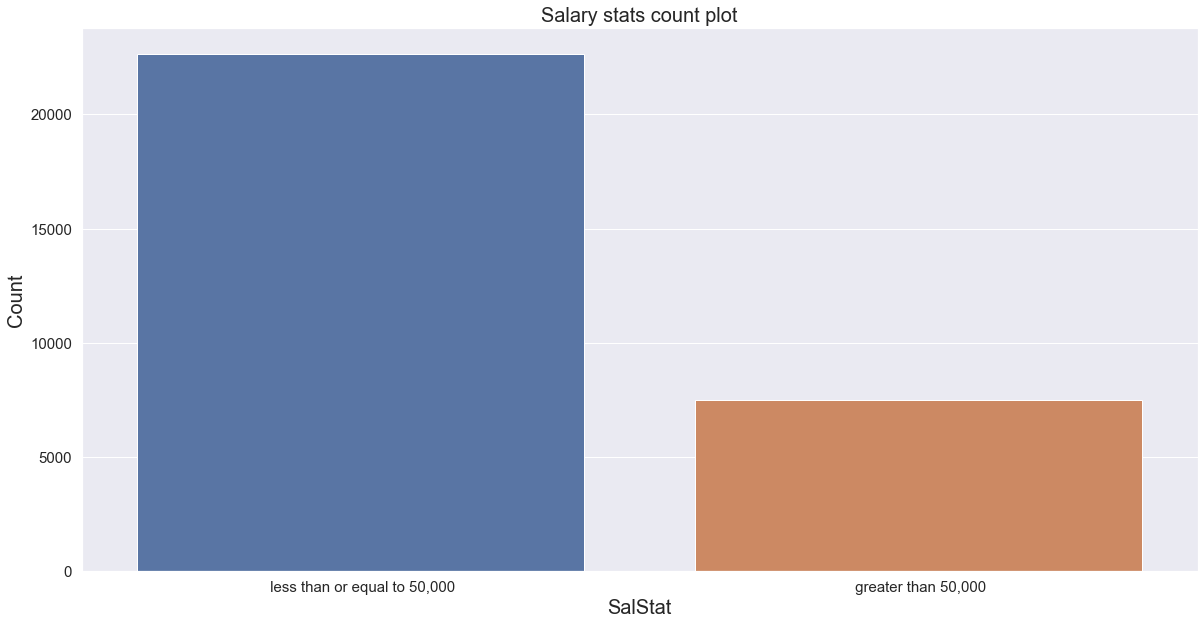

In [26]:
sns.set_style('darkgrid')
sns.set(rc={'figure.figsize':(20,10)})
sns.countplot(df2["SalStat"])

plt.title('Salary stats count plot', fontsize=20)
plt.xlabel('SalStat', fontsize=20)
plt.ylabel('Count', fontsize=20)
plt.tick_params(axis='both', labelsize=15)

#### distplot

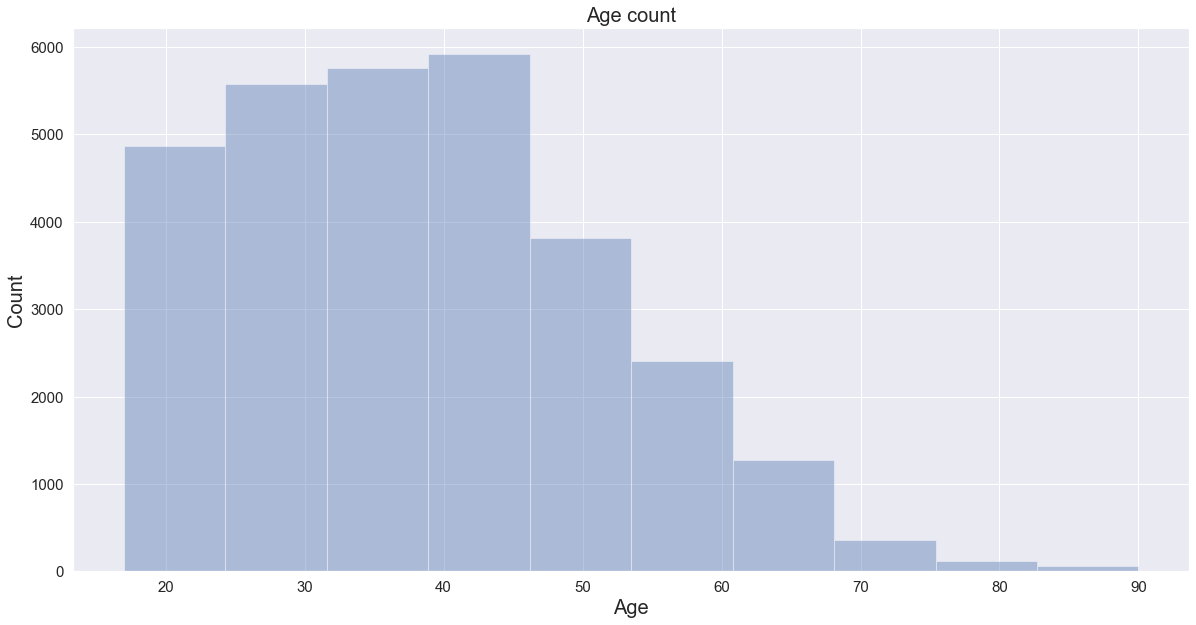

In [29]:
sns.set_style('darkgrid')
sns.set(rc={'figure.figsize':(20,10)})
sns.distplot(df2["age"], bins=10, kde=False)

plt.title('Age count', fontsize=20)
plt.xlabel('Age', fontsize=20)
plt.ylabel('Count', fontsize=20)
plt.tick_params(axis='both', labelsize=15)

### Bivariate analysis for Age vs SalStat

SalStat
 greater than 50,000             43
 less than or equal to 50,000    34
Name: age, dtype: int64


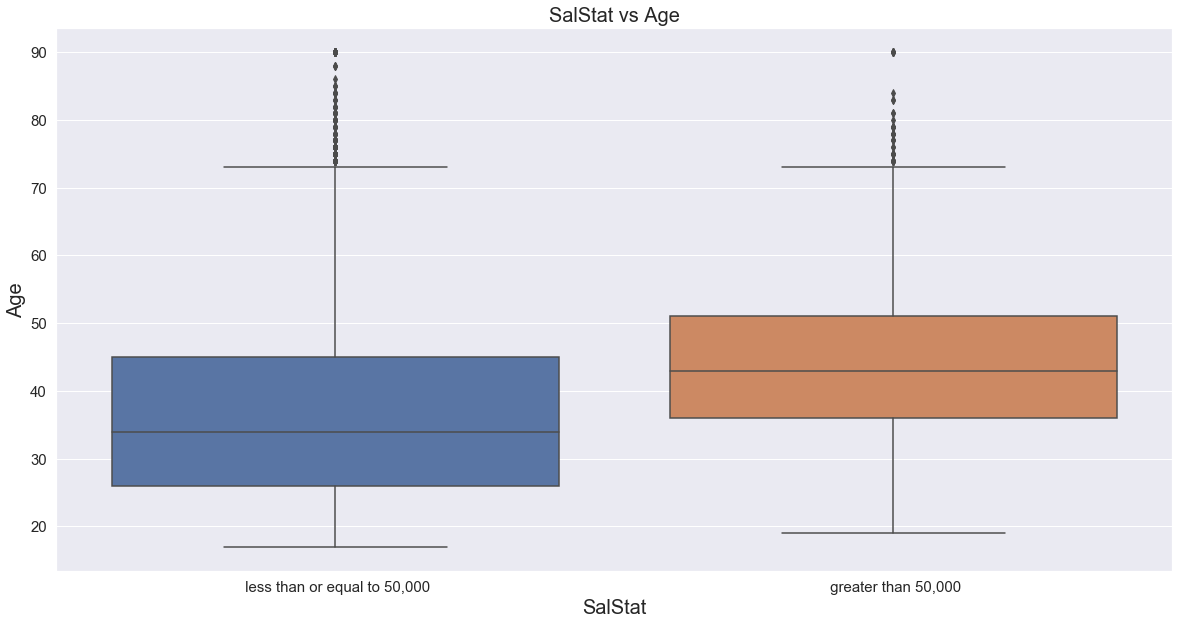

In [36]:
sns.set(rc={'figure.figsize':(20,10)})
sns.boxplot(df2["SalStat"], df2["age"])

plt.title('SalStat vs Age', fontsize=20)
plt.xlabel('SalStat', fontsize=20)
plt.ylabel('Age', fontsize=20)
plt.tick_params(axis='both', labelsize=15)

salstat_vs_age = df2.groupby('SalStat')["age"].median()
print(salstat_vs_age)

## Logistic Regression

### Salary Status is the dependent variable (y) so we need to convert it into integer to apply some machine learning algorithm because it requires numbers not categories

In [48]:
df2["SalStat"] = df2["SalStat"].map({
    " less than or equal to 50,000":0,
    " greater than 50,000":1
})

,age,JobType,EdType,maritalstatus,occupation,relationship,race,gender,capitalgain,capitalloss,hoursperweek,nativecountry,SalStat
0,45,Private,HS-grad,Divorced,Adm-clerical,Not-in-family,White,Female,0,0,28,United-States,0
1,24,Federal-gov,HS-grad,Never-married,Armed-Forces,Own-child,White,Male,0,0,40,United-States,0
2,44,Private,Some-college,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,40,United-States,1
3,27,Private,9th,Never-married,Craft-repair,Other-relative,White,Male,0,0,40,Mexico,0
4,20,Private,Some-college,Never-married,Sales,Not-in-family,White,Male,0,0,35,United-States,0
5,44,Private,HS-grad,Widowed,Exec-managerial,Unmarried,Black,Female,0,0,40,United-States,0
6,51,Private,HS-grad,Married-civ-spouse,Craft-repair,Husband,Amer-Indian-Eskimo,Male,0,0,40,United-States,0
7,20,Private,HS-grad,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,0
9,19,Private,HS-grad,Never-married,Machine-op-inspct,Own-child,Black,Female,0,0,40,United-States,0
10,45,Self-emp-inc,Some-college,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,55,United-States,1


### Why use pd.dummies instead of OneHotEncoder?

In [50]:
"""
pd.get_dummies results to a Pandas DataFrame whereas OneHotEncoder results a SciPy CSR matrix.
pd.get_dummies is much faster than the OneHotEncoder
"""

'\npd.get_dummies results to a Pandas DataFrame whereas OneHotEncoder results a SciPy CSR matrix.\npd.get_dummies is much faster than the OneHotEncoder\n'

In [51]:
df3 = pd.get_dummies( df2, drop_first=True)

In [58]:
column_list = list(df3.columns)
column_list

['age',
 'capitalgain',
 'capitalloss',
 'hoursperweek',
 'SalStat',
 'JobType_ Local-gov',
 'JobType_ Private',
 'JobType_ Self-emp-inc',
 'JobType_ Self-emp-not-inc',
 'JobType_ State-gov',
 'JobType_ Without-pay',
 'EdType_ 11th',
 'EdType_ 12th',
 'EdType_ 1st-4th',
 'EdType_ 5th-6th',
 'EdType_ 7th-8th',
 'EdType_ 9th',
 'EdType_ Assoc-acdm',
 'EdType_ Assoc-voc',
 'EdType_ Bachelors',
 'EdType_ Doctorate',
 'EdType_ HS-grad',
 'EdType_ Masters',
 'EdType_ Preschool',
 'EdType_ Prof-school',
 'EdType_ Some-college',
 'maritalstatus_ Married-AF-spouse',
 'maritalstatus_ Married-civ-spouse',
 'maritalstatus_ Married-spouse-absent',
 'maritalstatus_ Never-married',
 'maritalstatus_ Separated',
 'maritalstatus_ Widowed',
 'occupation_ Armed-Forces',
 'occupation_ Craft-repair',
 'occupation_ Exec-managerial',
 'occupation_ Farming-fishing',
 'occupation_ Handlers-cleaners',
 'occupation_ Machine-op-inspct',
 'occupation_ Other-service',
 'occupation_ Priv-house-serv',
 'occupation_ Pr

In [84]:
features.remove('SalStat')
features

['nativecountry_ Italy',
 'JobType_ Self-emp-not-inc',
 'nativecountry_ China',
 'nativecountry_ Outlying-US(Guam-USVI-etc)',
 'nativecountry_ Germany',
 'occupation_ Craft-repair',
 'relationship_ Other-relative',
 'nativecountry_ Thailand',
 'nativecountry_ France',
 'EdType_ Masters',
 'occupation_ Exec-managerial',
 'EdType_ 5th-6th',
 'relationship_ Wife',
 'race_ Asian-Pac-Islander',
 'capitalgain',
 'nativecountry_ Portugal',
 'nativecountry_ Scotland',
 'JobType_ Local-gov',
 'age',
 'EdType_ Bachelors',
 'relationship_ Unmarried',
 'nativecountry_ Hong',
 'EdType_ Doctorate',
 'nativecountry_ Trinadad&Tobago',
 'EdType_ Assoc-voc',
 'occupation_ Handlers-cleaners',
 'nativecountry_ Japan',
 'nativecountry_ Nicaragua',
 'relationship_ Own-child',
 'nativecountry_ Guatemala',
 'nativecountry_ Puerto-Rico',
 'nativecountry_ Yugoslavia',
 'EdType_ 12th',
 'relationship_ Not-in-family',
 'EdType_ 1st-4th',
 'EdType_ Some-college',
 'nativecountry_ Ecuador',
 'EdType_ Assoc-acdm',
 

In [80]:
y = df3['SalStat'].values

In [81]:
x = df3[features].values

In [85]:
train_x, test_x, train_y, test_y = train_test_split(x, y, test_size = 0.2, random_state = 0)

## Make an instance of logistic regression model

In [86]:
logistic = LogisticRegression()

In [87]:
logistic.fit(train_x, train_y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [88]:
logistic.coef_

array([[ 4.39376890e-02, -9.94749866e-01, -1.94103819e-01,
        -5.77213184e-02,  7.17598264e-02, -2.22759826e-01,
        -8.34293798e-01, -2.74682328e-02,  1.91705541e-02,
         1.00286458e+00,  7.95228893e-01, -6.61648848e-01,
         9.31230850e-01, -5.63199086e-01,  3.22147122e-04,
        -1.03964075e-01, -3.04187969e-02, -6.95351830e-01,
         2.20420648e-02,  6.28899070e-01, -9.52463055e-01,
        -2.72579157e-02,  1.25360106e+00, -1.27320283e-02,
         7.91370366e-02, -8.73101508e-01, -3.82220056e-02,
        -8.59093924e-02, -1.59640040e+00, -7.09035568e-02,
        -2.46210567e-01,  5.05531153e-03, -3.83711337e-01,
        -8.31439235e-01, -3.81336050e-01, -1.53181715e-01,
        -2.00058522e-02, -4.72053595e-02, -1.55533938e-01,
        -2.14745473e-01, -7.20984608e-01, -8.66091076e-03,
        -1.64858625e-01, -6.89376578e-02, -4.72001857e-01,
        -8.77777647e-01, -1.04396578e-01, -6.65760032e-01,
        -4.06206475e-01, -1.65535627e-01, -2.52323704e-0

In [89]:
logistic.intercept_

array([-3.00836511])

### Prediction

In [90]:
prediction = logistic.predict(test_x)
prediction

array([0, 0, 0, ..., 0, 0, 1])

### Confusion matrix

In [91]:
confusion_matrix = confusion_matrix(test_y, prediction)
confusion_matrix

array([[4213,  317],
       [ 647,  856]])

### Accuracy

In [92]:
accuracy = accuracy_score(test_y, prediction)
accuracy

0.8402121664180342

### Miscalculated samples

In [93]:
print("Miscalculated data: ", (test_y!=prediction).sum())

Miscalculated data:  964
